In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


In [13]:
?RandomForestRegressor

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X.isna().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [4]:
def calculate_model(model_dt = DecisionTreeRegressor()):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)
    model_dt.fit(Xtrain, ytrain)
    DecisionTreeRegressor()
    pred_dt = model_dt.predict(Xtest)
    return mean_squared_error(ytest, pred_dt)

print(calculate_model())

0.5346480650545735


In [5]:
print(calculate_model(model_dt = RandomForestRegressor()))

0.25953944406212687


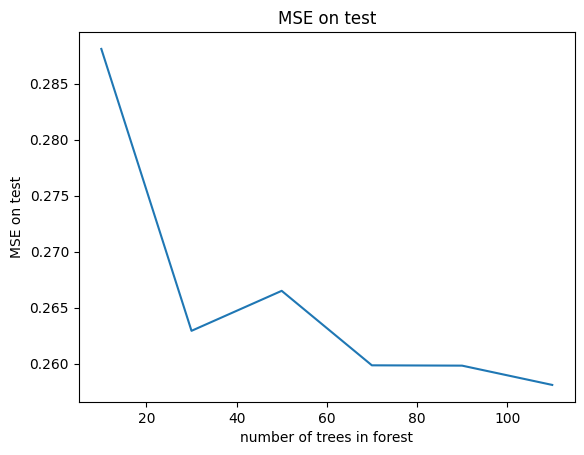

In [6]:
N = []
MSE = []
for n in np.arange(10, 120, 20):
    rf = RandomForestRegressor(n_estimators = n)
    N.append(n)
    MSE.append(calculate_model(model_dt = rf))


def show_plot(N=N, MSE=MSE):
    plt.plot(N, MSE, '-')
    plt.xlabel('number of trees in forest')
    plt.ylabel('MSE on test')
    plt.title( 'MSE on test')
    plt.show();

show_plot(N, MSE)


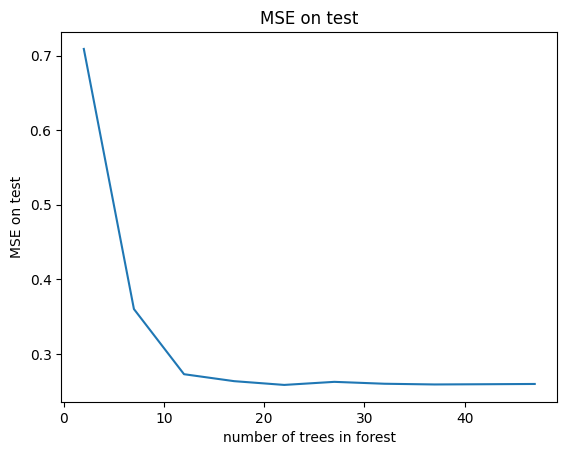

In [7]:
D = []
MSE = []
for d in np.arange(2, 50, 5):
    rf = RandomForestRegressor(n_estimators = 100, max_depth = d)
    D.append(d)
    MSE.append(calculate_model(model_dt = rf))


show_plot(N=D, MSE=MSE)

In [8]:
print(calculate_model(model_dt = RandomForestRegressor(n_estimators = 100, max_depth = 20)))

0.2625503663426416


In [9]:
from sklearn.model_selection import cross_val_score


In [10]:
scores = cross_val_score(RandomForestRegressor(n_estimators = 100, max_depth =20), X, y, cv=3, scoring='neg_mean_squared_error')
scores

array([-0.51448898, -0.33258173, -0.53673038])

In [11]:
import numpy as np


In [12]:
mean=np.mean(-scores)
std=np.std(-scores)

print(f'mean={mean}')
print(f'std={std}')

mean=0.46126703117523155
std=0.0914461591161943
